# Comparing SVM and simple neural networks. 

This question is to implement and compare SVM and simple neural networks for the same datasets we tried for the last homework. We suggest to use Scikit-learn, which is a commonly-used and powerful Python library with various machine learning tools. But you can also use other similar libraries in other programming languages of your choice to perform the tasks. You may use a neural networks function sklearn.neural network with hidden layer sizes=(5, 2). Tune the step size so you have reasonable results. You may use svc and tune the penalty term C to get reasonable results. Part One (Divorce classiﬁcation/prediction). (20 points) We will compare using the same dataset as the last homework, which is about participants who completed the personal information form and a divorce predictors scale. The data is a modiﬁed version of the publicly available at https://archive.ics.uci.edu/ml/datasets/ Divorce+Predictors+data+set (by injecting noise so you will not replicate the results on uci website). There are 170 participants and 54 attributes (or predictor variables) that are all real-valued. The dataset q3.csv. The last column of the CSV ﬁle is label y (1 means “divorce”, 0 means “no divorce”). Each column is for one feature (predictor variable), and each row is a sample (participant). A detailed explanation for each feature (predictor variable) can be found at the website link above. Our goal is to build a classiﬁer using training data, such that given a test sample, we can classify (or essentially predict) whether its label is 0 (“no divorce”) or 1 (“divorce”). Build two classiﬁers using SVM and a simple neural networks. First random shuﬄe the data set. Then use the ﬁrst 80% data for training and the remaining 20% for testing. If you use scikit-learn you can use train test split to split the dataset.


#### Importing Modules

In [93]:
import pandas as pd 
import random
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import RandomState
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

#### Importing Data

In [94]:
np.random.seed(6)
q3data = pd.read_csv("q3.csv",header=None)
X = q3data.loc[:, :53]
y = q3data.loc[:, 54]
(Xtrain, Xtest, ytrain, ytest) = train_test_split(q3data.iloc[:, 0:-1], q3data.iloc[:, -1], test_size=0.2, shuffle=True)
print("Total Independent Variables Observations for Training: ",len(Xtrain))
print("Total Response Observations for Testing: ",len(Xtest))

Total Independent Variables Observations for Training:  136
Total Response Observations for Testing:  34


(a) (15 points) Report testing accuracy for each of the two classiﬁers. Comment on their performance: which performs better and make a guess why it performs better in this setting. 

#### Support Vector Machine

In [95]:
C_Values=[.001,0.1,1,100]
for i in C_Values:
    clf = svm.LinearSVC(C=i)
    y_pred = clf.fit(Xtrain, ytrain).predict(Xtest)
    print("C=",i,",Points classified incorrectly - SVM out of %d points : %d" % (Xtest.shape[0], (ytest != y_pred).sum()))
    print("Accuracy of SVM :",(ytest == y_pred).sum()*100/Xtest.shape[0])

C= 0.001 ,Points classified incorrectly - SVM out of 34 points : 5
Accuracy of SVM : 85.29411764705883
C= 0.1 ,Points classified incorrectly - SVM out of 34 points : 6
Accuracy of SVM : 82.3529411764706
C= 1 ,Points classified incorrectly - SVM out of 34 points : 6
Accuracy of SVM : 82.3529411764706
C= 100 ,Points classified incorrectly - SVM out of 34 points : 6
Accuracy of SVM : 82.3529411764706


#### Neural Network

In [96]:
stages = [0.1,0.01,0.001,0.0001]
for j in stages:
    NeuralNetwork = MLPClassifier(solver='lbfgs', alpha=1e-5,learning_rate_init=j,hidden_layer_sizes=(5, 2))
    y_pred=NN.fit(Xtrain, ytrain).predict(Xtest)
    print("Learning rate=",j,", Points classified incorrectly - Neural Network out of %d points : %d" % (Xtest.shape[0], (ytest != y_pred).sum()))
    print("Accuracy of Neural Network :",(ytest == y_pred).sum()*100/Xtest.shape[0])

Learning rate= 0.1 , Points classified incorrectly - Neural Network out of 34 points : 7
Accuracy of Neural Network : 79.41176470588235
Learning rate= 0.01 , Points classified incorrectly - Neural Network out of 34 points : 3
Accuracy of Neural Network : 91.17647058823529
Learning rate= 0.001 , Points classified incorrectly - Neural Network out of 34 points : 3
Accuracy of Neural Network : 91.17647058823529
Learning rate= 0.0001 , Points classified incorrectly - Neural Network out of 34 points : 3
Accuracy of Neural Network : 91.17647058823529


(b) (15 points) Use the ﬁrst two features to train two new classiﬁers. Plot the data points and decision boundary of each classiﬁer. Comment on the diﬀerence between the decision boundary for the two classiﬁers. Please clearly represent the data points with diﬀerent labels using diﬀerent colors.

In [120]:
X1=q3data.iloc[:, 0:2].values
y1=q3data.iloc[:,54].values

Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X1,y1, test_size=0.2, random_state=1, shuffle=True)

clf1 = svm.LinearSVC()
clf1.fit(Xtrain1, ytrain1)
NeuralNetowrk1 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 2))
NeuralNetowrk1.fit(Xtrain1, ytrain1)

y_pred1 = clf1.predict(Xtest1)
print("Points Classified Incorrectly - SVM out of a total %d points : %d" % (Xtest1.shape[0], (ytest1 != y_pred1).sum()))
print("SVM Accuracy =",(ytest1 == y_pred1).sum()*100/Xtest1.shape[0])

y_pred1=NeuralNetowrk1.predict(Xtest1)
print(" ")
print("Points Classified Incorrectly - Neural network out of a %d points : %d" % (Xtest1.shape[0], (ytest1 != y_pred1).sum()))
print("Neural Network Accuracy =",(ytest1 == y_pred1).sum()*100/Xtest1.shape[0])

Points Classified Incorrectly - SVM out of a total 34 points : 5
SVM Accuracy = 85.29411764705883
 
Points Classified Incorrectly - Neural network out of a 34 points : 4
Neural Network Accuracy = 88.23529411764706


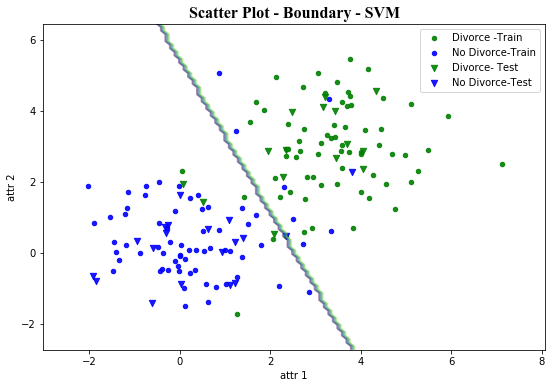

In [121]:
xmin, xmax = Xtrain1[:, 0].min() - 1, Xtrain1[:, 0].max() + 1
ymin, ymax = Xtrain1[:, 1].min() - 1, Xtrain1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.1),
                     np.arange(ymin, ymax, 0.1))

f, axis = plt.subplots(figsize=(9, 6))
plt.title("Scatter Plot - Boundary - SVM",fontname="Times New Roman",fontweight="bold",fontsize=16)

Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axis.contour(xx, yy, Z, alpha=0.4)

for i in range(ytrain1.shape[0]):
    if ytrain1[i]==0:
        axis.scatter(Xtrain1[i, 0], Xtrain1[i, 1], marker="o",s=20,alpha=0.9,c="b",label="No Divorce-Train") 
    else :
        axis.scatter(Xtrain1[i, 0], Xtrain1[i, 1], marker="o",s=20,alpha=0.9,c="g",label="Divorce -Train")
    
for i in range(ytest1.shape[0]):
    if ytest1[i]==0:
        axis.scatter(Xtest1[i, 0], Xtest1[i, 1], marker="v",s=40,alpha=0.9,c="b",label="No Divorce-Test") 
    else :
        axis.scatter(Xtest1[i, 0], Xtest1[i, 1], marker="v",s=40,alpha=0.9,c="g",label="Divorce- Test") 

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axis.legend(by_label.values(), by_label.keys())

axis.set_xlabel('attr 1')
axis.set_ylabel('attr 2')
plt.show()

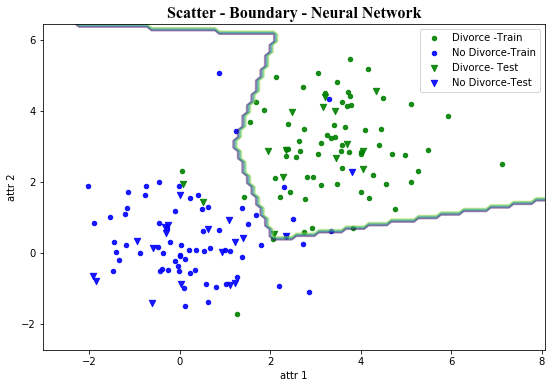

In [122]:
xmin, xmax = Xtrain1[:, 0].min() - 1, Xtrain1[:, 0].max() + 1
ymin, ymax = Xtrain1[:, 1].min() - 1, Xtrain1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.1),
                     np.arange(ymin, ymax, 0.1))

f, axis = plt.subplots(figsize=(9, 6))
plt.title("Scatter - Boundary - Neural Network",fontname="Times New Roman",fontweight="bold",fontsize=16)

Z = NeuralNetowrk1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axis.contour(xx, yy, Z, alpha=0.4)

for i in range(ytrain1.shape[0]):
    if ytrain1[i]==0:
        axis.scatter(Xtrain1[i, 0], Xtrain1[i, 1], marker="o",s=20,alpha=0.9,c="b",label="No Divorce-Train") 
    else :
        axis.scatter(Xtrain1[i, 0], Xtrain1[i, 1], marker="o",s=20,alpha=0.9,c="g",label="Divorce -Train")
    
for i in range(ytest1.shape[0]):
    if ytest1[i]==0:
        axis.scatter(Xtest1[i, 0], Xtest1[i, 1], marker="v",s=40,alpha=0.9,c="b",label="No Divorce-Test") 
    else :
        axis.scatter(Xtest1[i, 0], Xtest1[i, 1], marker="v",s=40,alpha=0.9,c="g",label="Divorce- Test") 

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axis.legend(by_label.values(), by_label.keys())

axis.set_xlabel('attr 1')
axis.set_ylabel('attr 2')
plt.show()

# Part Two (Handwritten digits classiﬁcation)

 (20 points) Repeat the above part (a) using the MNIST Data in our previous homework. Here, give “digit” 6 label y = 1, and give “digit” 2 label y = 0. All the pixels in each image will be the feature (predictor variables) for that sample (i.e., image). Our goal is to build classiﬁers such that given a new testing sample, we can tell it is a 2 or a 6. Using the ﬁrst 80% of the samples for training and remaining 20% for testing. Report the classiﬁcation accuracy on testing data, for each of the two classiﬁers. Comment on their performance: which performs better and make a guess why they perform better in this setting

#### Importing Data

In [92]:
isomap_a = sio.loadmat('data.mat')['data']
label_contents = sio.loadmat('label.mat')
label_a = label_contents['trueLabel']
label_a[label_a ==2] = 0
label_a[label_a ==6] = 1
y=np.array(label_a.T).flatten()

#### Support Vector Machine

In [88]:
X2train, X2test, y2train, y2test = train_test_split(isomap_a.T, y, test_size=0.2, random_state=0)
for c in C_Values:
    clf1 = svm.LinearSVC(C=c)
    y2pred = clf1.fit(X2train, y2train).predict(X2test)
    print("C=",c,", Points incorrectly classified - SVM out of %d points : %d" % (X2test.shape[0], (y2test != y2pred).sum()))
    print("Accuracy SVM :",(y2test == y2pred).sum()*100/X2test.shape[0])

C= 0.001 , Points incorrectly classified - SVM out of 398 points : 10
Accuracy SVM : 97.48743718592965
C= 0.1 , Points incorrectly classified - SVM out of 398 points : 7
Accuracy SVM : 98.24120603015075
C= 1 , Points incorrectly classified - SVM out of 398 points : 8
Accuracy SVM : 97.98994974874371
C= 100 , Points incorrectly classified - SVM out of 398 points : 9
Accuracy SVM : 97.73869346733669


#### Neural Network

In [89]:
for a in stages:
    NeuralNetowrk1 =  MLPClassifier(solver='lbfgs', alpha=1e-5,learning_rate_init=a,hidden_layer_sizes=(5, 2))
    NeuralNetowrk1.fit(X2train, y2train)
    y2pred=NeuralNetowrk1.predict(X2test)
    print("Learning rate=",a,", Points incorrectly classified - Neural Network out of %d points : %d" % (X2test.shape[0], (y2test != y2pred).sum()))
    print("Accuracy Neural Network :",(y2test == y2pred).sum()*100/X2test.shape[0])

Learning rate= 0.1 , Points incorrectly classified - Neural Network out of 398 points : 4
Accuracy Neural Network : 98.99497487437186
Learning rate= 0.01 , Points incorrectly classified - Neural Network out of 398 points : 5
Accuracy Neural Network : 98.74371859296483
Learning rate= 0.001 , Points incorrectly classified - Neural Network out of 398 points : 8
Accuracy Neural Network : 97.98994974874371
Learning rate= 0.0001 , Points incorrectly classified - Neural Network out of 398 points : 13
Accuracy Neural Network : 96.73366834170854
